#IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#IMPORTING THE DATASET

In [2]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

#Implementing UCB

In [3]:
import random #for beta distributions
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1=[0]*d
numbers_of_rewards_0=[0]*d
total_rewards=0
for n in range(0,N):
  ad=0
  max_random=0
  for i in range(0,d):
    random_beta=random.betavariate(numbers_of_rewards_1[i]+1,numbers_of_rewards_0[i]+1)
    if random_beta>max_random:
      max_random=random_beta
      ad=i
  ads_selected.append(ad)
  reward=dataset.values[n,ad]
  if reward==1:
    numbers_of_rewards_1[ad]+=1
  else:
    numbers_of_rewards_0[ad]+=1
  total_rewards+=reward




#Visualizing the results

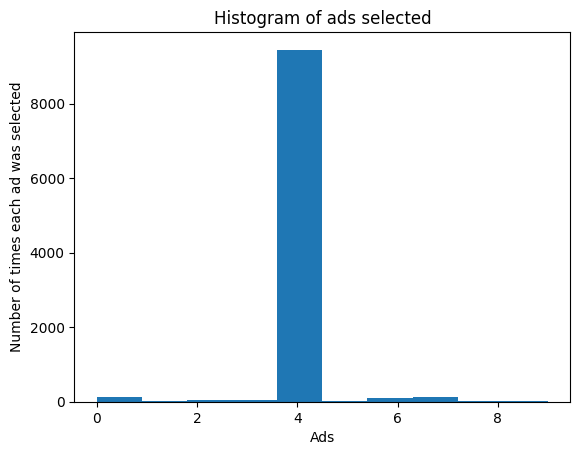

In [4]:
plt.hist(ads_selected) #array of 10000 ads selected for each round (1-10000)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

#Displaying the results from the first output of the apriori function

In [ ]:
results=list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

#Putting the results in a well organised manner

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    return list(zip(lhs, rhs, supports))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Product 1', 'Product 2', 'Support'])

#Displaying the results in descending lifts

In [ ]:
resultsinDataFrame.nlargest(n=10,columns='Support')

,Product 1,Product 2,Support
4,herb & pepper,ground beef,0.015998
7,whole wheat pasta,olive oil,0.007999
2,pasta,escalope,0.005866
1,mushroom cream sauce,escalope,0.005733
5,tomato sauce,ground beef,0.005333
8,pasta,shrimp,0.005066
0,light cream,chicken,0.004533
3,fromage blanc,honey,0.003333
6,light cream,olive oil,0.003200
